In [1]:
import torch

# 2.5.1. A Simple Function

In [2]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [3]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default

In [4]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [5]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [6]:
x.grad == 4 * x

tensor([True, True, True, True])

In [8]:
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [ ]:
y.backward()  # The new gradient is added to the already stored gradient
x.grad

tensor([2., 2., 2., 2.])

In [15]:
x.grad.zero_()
y = x * x
x, y

(tensor([0., 1., 2., 3.], requires_grad=True),
 tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>))

In [16]:
len(y)

4

In [11]:
torch.ones(len(y))

tensor([1., 1., 1., 1.])

In [ ]:
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

# 2.5.3. Detaching Computation

In [18]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [19]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

# 2.5.4. Gradients and Python Control Flow

In [26]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [30]:
a = torch.randn(size=(), requires_grad=True)
a

tensor(1.0433, requires_grad=True)

In [31]:
d = f(a)
d

tensor(1068.3829, grad_fn=<MulBackward0>)

In [33]:
d.backward()

In [34]:
a.grad == d / a

tensor(True)

In [35]:
a.grad

tensor(1024.)

# 2.5.6. Exercises

## 3

In [36]:
a = torch.randn((2, 3), requires_grad=True)
a

tensor([[-0.0120,  0.7694,  1.2590],
        [ 0.3949,  0.1268,  1.3634]], requires_grad=True)

In [38]:
d = f(a)
d

tensor([[ -6.1386, 393.9182, 644.6167],
        [202.1913,  64.9196, 698.0662]], grad_fn=<MulBackward0>)

In [ ]:
d.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

# 4.

In [41]:
import numpy as np
x = torch.arange(-2*np.pi, 2*np.pi, 0.1)
x.requires_grad=True
y = torch.sin(x)
y.backward(gradient=torch.ones_like(y))
x.grad

tensor([ 1.0000,  0.9950,  0.9801,  0.9553,  0.9211,  0.8776,  0.8253,  0.7648,
         0.6967,  0.6216,  0.5403,  0.4536,  0.3624,  0.2675,  0.1700,  0.0707,
        -0.0292, -0.1288, -0.2272, -0.3233, -0.4161, -0.5048, -0.5885, -0.6663,
        -0.7374, -0.8011, -0.8569, -0.9041, -0.9422, -0.9710, -0.9900, -0.9991,
        -0.9983, -0.9875, -0.9668, -0.9365, -0.8968, -0.8481, -0.7910, -0.7259,
        -0.6536, -0.5748, -0.4903, -0.4008, -0.3073, -0.2108, -0.1122, -0.0124,
         0.0875,  0.1865,  0.2837,  0.3780,  0.4685,  0.5544,  0.6347,  0.7087,
         0.7756,  0.8347,  0.8855,  0.9275,  0.9602,  0.9833,  0.9965,  0.9999,
         0.9932,  0.9766,  0.9502,  0.9144,  0.8694,  0.8157,  0.7539,  0.6845,
         0.6084,  0.5261,  0.4385,  0.3466,  0.2513,  0.1534,  0.0540, -0.0460,
        -0.1455, -0.2435, -0.3392, -0.4314, -0.5193, -0.6020, -0.6787, -0.7486,
        -0.8111, -0.8654, -0.9111, -0.9477, -0.9748, -0.9922, -0.9997, -0.9972,
        -0.9847, -0.9624, -0.9304, -0.88

In [46]:
x.shape, y.shape

(torch.Size([126]), torch.Size([126]))

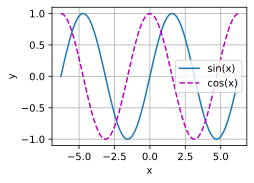

In [47]:
from d2l import torch as d2l
d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.detach().numpy()], 'x', 'y', legend=['sin(x)', 'cos(x)'])

# 5.

In [54]:
x = torch.arange(0, 5.0, 0.1,requires_grad=True)
y = torch.log(x**2) * torch.sin(x) + 1/x

In [55]:
y.backward(gradient=torch.ones_like(y))
x.grad

tensor([        nan, -1.0259e+02, -2.6168e+01, -1.1441e+01, -5.9908e+00,
        -3.2989e+00, -1.7388e+00, -7.4579e-01, -8.0041e-02,  3.7517e-01,
         6.8294e-01,  8.8040e-01,  9.9109e-01,  1.0310e+00,  1.0120e+00,
         9.4291e-01,  8.3139e-01,  6.8391e-01,  5.0632e-01,  3.0409e-01,
         8.2395e-02, -1.5378e-01, -3.9963e-01, -6.5049e-01, -9.0186e-01,
        -1.1494e+00, -1.3889e+00, -1.6165e+00, -1.8285e+00, -2.0215e+00,
        -2.1923e+00, -2.3381e+00, -2.4565e+00, -2.5454e+00, -2.6031e+00,
        -2.6284e+00, -2.6204e+00, -2.5786e+00, -2.5032e+00, -2.3944e+00,
        -2.2532e+00, -2.0808e+00, -1.8789e+00, -1.6494e+00, -1.3949e+00,
        -1.1179e+00, -8.2160e-01, -5.0911e-01, -1.8397e-01,  1.5017e-01])

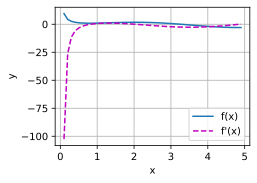

In [56]:
d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.detach().numpy()], 'x', 'y', legend=['f(x)', 'f\'(x)'])

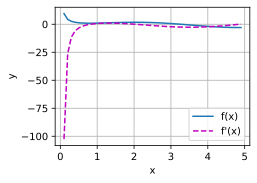

In [57]:
gradients_x = 2*torch.sin(x) / x + torch.log(x**2) * torch.cos(x) - 1/(x**2)
d2l.plot(x.detach().numpy(), [y.detach().numpy(), gradients_x.detach().numpy()], 'x', 'y', legend=['f(x)', 'f\'(x)'])